Example Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

Epoch 1/10
1563/1563 [==============================] - 78s 41ms/step - loss: 1.5695 - accuracy: 0.4290 - val_loss: 1.3223 - val_accuracy: 0.5323
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.2135 - accuracy: 0.5704 - val_loss: 1.0960 - val_accuracy: 0.6137
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.0679 - accuracy: 0.6238 - val_loss: 1.0621 - val_accuracy: 0.6235
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9695 - accuracy: 0.6598 - val_loss: 0.9839 - val_accuracy: 0.6588
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8979 - accuracy: 0.6832 - val_loss: 0.9232 - val_accuracy: 0.6791
Epoch 6/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.8411 - accuracy: 0.7069 - val_loss: 0.9072 - val_accuracy: 0.6885
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7907 - accuracy: 0.7234 - val_loss: 0.8826 -

In [8]:
seed = 2401
tf.random.set_seed(seed)
np.random.seed(seed)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

def create_image_dataset(directory, img_height, img_width, batch_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode = "rgb",
        class_mode='sparse', 
        subset='training'
    )
    
    validation_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode = "rgb",
        class_mode='sparse', 
        subset='validation'
    )
    
    return train_generator, validation_generator

image_path = r"C:\\Users\\Regine Pamphile\\Desktop\\Slide Pics\\Microscope Images"
train_gen, val_gen = create_image_dataset(image_path, 250, 250, 32)
print(train_gen.class_indices)
print(val_gen.class_indices)



Found 3483 images belonging to 28 classes.
Found 857 images belonging to 28 classes.
{'Alternaria': 0, 'Arthrinium': 1, 'Aspergillus-Penicillium': 2, 'Aureobasidium': 3, 'Bipolaris': 4, 'Chaetomium': 5, 'Cladosporium': 6, 'Curvularia': 7, 'Diplocladiella': 8, 'Dustmite': 9, 'EPSU': 10, 'Hyphae': 11, 'Insect': 12, 'Memnoniella': 13, 'Microascus': 14, 'Monodictys': 15, 'Mucor-Rhizopus': 16, 'Nigrospora': 17, 'Paecilomyces': 18, 'Pollen': 19, 'Rust (Fungi)': 20, 'Scopulariopsis': 21, 'Sepedonium': 22, 'Spegazzinia': 23, 'Stachybotrys': 24, 'Tetraploa': 25, 'Torula': 26, 'Trichoderma': 27}
{'Alternaria': 0, 'Arthrinium': 1, 'Aspergillus-Penicillium': 2, 'Aureobasidium': 3, 'Bipolaris': 4, 'Chaetomium': 5, 'Cladosporium': 6, 'Curvularia': 7, 'Diplocladiella': 8, 'Dustmite': 9, 'EPSU': 10, 'Hyphae': 11, 'Insect': 12, 'Memnoniella': 13, 'Microascus': 14, 'Monodictys': 15, 'Mucor-Rhizopus': 16, 'Nigrospora': 17, 'Paecilomyces': 18, 'Pollen': 19, 'Rust (Fungi)': 20, 'Scopulariopsis': 21, 'Seped

In [10]:
print(type(train_gen))
print(type(val_gen))

<class 'keras.preprocessing.image.DirectoryIterator'>
<class 'keras.preprocessing.image.DirectoryIterator'>


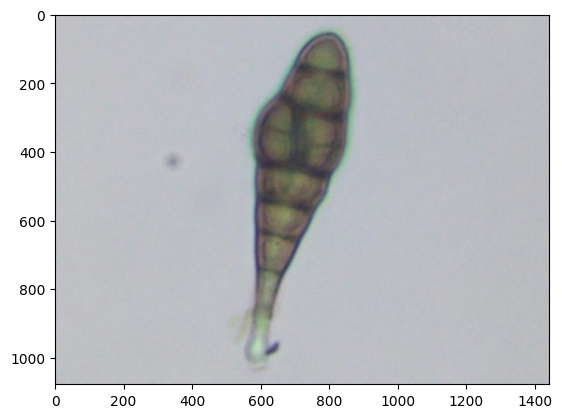

In [11]:
img = image.load_img(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Microscope Images\Alternaria\Alternaria (8).JPG")
plt.imshow(img)

In [12]:
plt.imread(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Microscope Images\Alternaria\Alternaria (8).JPG").shape

(1078, 1440, 3)

In [13]:
train_gen.classes
val_gen.classes

array([ 0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3

In [14]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

First Model

In [21]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(28) #layers must match the number of labels
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=10, 
                    validation_data=val_gen)

Epoch 1/10
109/109 [==============================] - 372s 3s/step - loss: 2.7979 - accuracy: 0.1413 - val_loss: 2.6237 - val_accuracy: 0.1692
Epoch 2/10
109/109 [==============================] - 313s 3s/step - loss: 2.5061 - accuracy: 0.2150 - val_loss: 2.4707 - val_accuracy: 0.1995
Epoch 3/10
109/109 [==============================] - 310s 3s/step - loss: 2.2275 - accuracy: 0.3210 - val_loss: 2.3734 - val_accuracy: 0.3127
Epoch 4/10
109/109 [==============================] - 335s 3s/step - loss: 1.7786 - accuracy: 0.4706 - val_loss: 2.4231 - val_accuracy: 0.3069
Epoch 5/10
109/109 [==============================] - 339s 3s/step - loss: 1.2799 - accuracy: 0.6190 - val_loss: 2.8618 - val_accuracy: 0.3302
Epoch 6/10
109/109 [==============================] - 325s 3s/step - loss: 0.8438 - accuracy: 0.7494 - val_loss: 3.5525 - val_accuracy: 0.3139
Epoch 7/10
109/109 [==============================] - 319s 3s/step - loss: 0.5333 - accuracy: 0.8562 - val_loss: 4.1792 - val_accuracy: 0.3057

Second Model

In [22]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.Dropout(0.5),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(28) #layers must match the number of labels
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=10, 
                    validation_data=val_gen)

Epoch 1/10
109/109 [==============================] - 357s 3s/step - loss: 2.7483 - accuracy: 0.1398 - val_loss: 2.6404 - val_accuracy: 0.1470
Epoch 2/10
109/109 [==============================] - 359s 3s/step - loss: 2.6799 - accuracy: 0.1324 - val_loss: 2.6508 - val_accuracy: 0.1470
Epoch 3/10
109/109 [==============================] - 354s 3s/step - loss: 2.6587 - accuracy: 0.1438 - val_loss: 2.6356 - val_accuracy: 0.1470
Epoch 4/10
109/109 [==============================] - 373s 3s/step - loss: 2.6080 - accuracy: 0.1708 - val_loss: 2.5620 - val_accuracy: 0.1844
Epoch 5/10
109/109 [==============================] - 346s 3s/step - loss: 2.4718 - accuracy: 0.2185 - val_loss: 2.3932 - val_accuracy: 0.2544
Epoch 6/10
109/109 [==============================] - 344s 3s/step - loss: 2.3202 - accuracy: 0.2796 - val_loss: 2.3307 - val_accuracy: 0.3034
Epoch 7/10
109/109 [==============================] - 366s 3s/step - loss: 2.0899 - accuracy: 0.3569 - val_loss: 2.1497 - val_accuracy: 0.3384

Third Model

In [23]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(28) #layers must match the number of labels
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=15, 
                    validation_data=val_gen)

Epoch 1/15
109/109 [==============================] - 358s 3s/step - loss: 2.8086 - accuracy: 0.1312 - val_loss: 2.6464 - val_accuracy: 0.1470
Epoch 2/15
109/109 [==============================] - 361s 3s/step - loss: 2.6766 - accuracy: 0.1398 - val_loss: 2.6346 - val_accuracy: 0.1424
Epoch 3/15
109/109 [==============================] - 353s 3s/step - loss: 2.6631 - accuracy: 0.1427 - val_loss: 2.6460 - val_accuracy: 0.1459
Epoch 4/15
109/109 [==============================] - 359s 3s/step - loss: 2.6016 - accuracy: 0.1763 - val_loss: 2.5161 - val_accuracy: 0.2089
Epoch 5/15
109/109 [==============================] - 364s 3s/step - loss: 2.4014 - accuracy: 0.2420 - val_loss: 2.3115 - val_accuracy: 0.2660
Epoch 6/15
109/109 [==============================] - 370s 3s/step - loss: 2.1643 - accuracy: 0.3282 - val_loss: 2.1440 - val_accuracy: 0.3512
Epoch 7/15
109/109 [==============================] - 370s 3s/step - loss: 1.9726 - accuracy: 0.3859 - val_loss: 2.1318 - val_accuracy: 0.3582

Fourth Model

In [24]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation='relu'),
                                tf.keras.layers.Dense(28) #layers must match the number of labels
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=10, 
                    validation_data=val_gen)

Epoch 1/10
109/109 [==============================] - 526s 5s/step - loss: 3.3174 - accuracy: 0.1338 - val_loss: 2.7577 - val_accuracy: 0.1412
Epoch 2/10
109/109 [==============================] - 508s 5s/step - loss: 2.6945 - accuracy: 0.1315 - val_loss: 2.6259 - val_accuracy: 0.1470
Epoch 3/10
109/109 [==============================] - 501s 5s/step - loss: 2.6526 - accuracy: 0.1527 - val_loss: 2.6189 - val_accuracy: 0.1482
Epoch 4/10
109/109 [==============================] - 496s 5s/step - loss: 2.5736 - accuracy: 0.1987 - val_loss: 2.6222 - val_accuracy: 0.1564
Epoch 5/10
109/109 [==============================] - 499s 5s/step - loss: 2.5101 - accuracy: 0.2064 - val_loss: 2.5047 - val_accuracy: 0.2287
Epoch 6/10
109/109 [==============================] - 530s 5s/step - loss: 2.2543 - accuracy: 0.2960 - val_loss: 2.4958 - val_accuracy: 0.2754
Epoch 7/10
109/109 [==============================] - 494s 5s/step - loss: 1.9760 - accuracy: 0.3948 - val_loss: 2.6898 - val_accuracy: 0.2964

Putting Everything Together

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

In [21]:
def create_image_dataset(directory, img_height, img_width, batch_size):
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
    
    train_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode = "rgb",
        class_mode='sparse', 
        subset='training'
    )
    
    validation_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode = "rgb",
        class_mode='sparse', 
        subset='validation'
    )
    
    return train_generator, validation_generator

image_path = r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Microscope Images"
train_gen, val_gen = create_image_dataset(image_path, 250, 250, 32)
# print(train_gen.class_indices)
# print(val_gen.class_indices)

Found 3483 images belonging to 28 classes.
Found 857 images belonging to 28 classes.


In [29]:
def create_test_image_dataset(directory, img_height, img_width, batch_size):
    datagen = ImageDataGenerator(rescale=1./255)

    test_generator = datagen.flow_from_directory(
        directory,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        color_mode = "rgb",
        class_mode=None, 
        # subset='test'
    )
    
    return test_generator

test_path = r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Test Images"
test_gen = create_test_image_dataset(test_path, 250, 250, 32)

Found 293 images belonging to 1 classes.


In [30]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.MaxPooling2D((2, 2)),
                                tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(64, activation='softmax'),
                                tf.keras.layers.Dense(28) #layers must match the number of labels
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_gen,
                    epochs=10, 
                    validation_data=val_gen)

model.evaluate(test_gen)

Epoch 1/10
109/109 [==============================] - 420s 4s/step - loss: 3.2014 - accuracy: 0.0827 - val_loss: 3.1189 - val_accuracy: 0.0840
Epoch 2/10
109/109 [==============================] - 344s 3s/step - loss: 3.0581 - accuracy: 0.1301 - val_loss: 2.9941 - val_accuracy: 0.1412
Epoch 3/10
109/109 [==============================] - 298s 3s/step - loss: 2.9504 - accuracy: 0.1401 - val_loss: 2.8985 - val_accuracy: 0.1412
Epoch 4/10
109/109 [==============================] - 293s 3s/step - loss: 2.8698 - accuracy: 0.1401 - val_loss: 2.8281 - val_accuracy: 0.1412
Epoch 5/10
109/109 [==============================] - 301s 3s/step - loss: 2.8108 - accuracy: 0.1401 - val_loss: 2.7769 - val_accuracy: 0.1412
Epoch 6/10
109/109 [==============================] - 323s 3s/step - loss: 2.7683 - accuracy: 0.1401 - val_loss: 2.7400 - val_accuracy: 0.1412
Epoch 7/10
109/109 [==============================] - 316s 3s/step - loss: 2.7380 - accuracy: 0.1401 - val_loss: 2.7133 - val_accuracy: 0.1412

[0.0, 0.0]

In [31]:
from tensorflow import keras
from keras_tuner import RandomSearch
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def build_model(hp):
    model = keras.Sequential()

    model.add(keras.layers.AveragePooling2D(6, 3, input_shape = (250, 250, 3)))


    for i in range(hp.Int("Conv Layers", min_value = 0, max_value = 0)):
        model.add(keras.layers.Conv2D(64, 3, activation = "relu")) 
        model.add(keras.layers.Conv2D(32, 3, activation = "relu"))   
    
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Flatten())   

       
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation = "relu"))
    model.add(keras.layers.Dense(28, activation = "softmax")) 
    
    model.compile(optimizer = "adam",
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ["accuracy"])
    
    return model 

tuner = RandomSearch(
    build_model,
    objective = "val_accuracy",
    max_trials = 32
)

tuner.search(train_gen, validation_data=val_gen, epochs = 10, batch_size = 32)


Trial 4 Complete [00h 10m 33s]
val_accuracy: 0.2205367535352707

Best val_accuracy So Far: 0.2718786597251892
Total elapsed time: 00h 45m 02s


INFO:tensorflow:Oracle triggered exit


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 222784)            0

In [33]:
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 01 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 1024
Score: 0.2718786597251892

Trial 00 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 512
Score: 0.26254376769065857

Trial 02 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 64
Score: 0.26137688755989075

Trial 03 summary
Hyperparameters:
Conv Layers: 0
Dense layer: 128
Score: 0.2205367535352707


In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
model_data_1 = pd.read_excel(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Model Data (Cleaned)\first_model_results_cleaned.xlsx")
model_data_2 = pd.read_excel(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Model Data (Cleaned)\second_model_results_cleaned.xlsx")
model_data_3 = pd.read_excel(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Model Data (Cleaned)\third_model_results_cleaned.xlsx")
model_data_4 = pd.read_excel(r"C:\Users\Regine Pamphile\Desktop\Slide Pics\Model Data (Cleaned)\fourth_model_results_cleaned.xlsx")

In [37]:
model_data_1.head()

,Epochs,Loss,Accuracy,Validation Loss,Validation Accuracy
0,1,2.7979,0.1413,2.6237,0.1692
1,2,2.5061,0.2150,2.4707,0.1995
2,3,2.2275,0.3210,2.3734,0.3127
3,4,1.7786,0.4706,2.4231,0.3069
4,5,1.2799,0.6190,2.8618,0.3302


In [38]:
epochs_1 = [epoch for epoch in model_data_1['Epochs']]
print(epochs_1)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [39]:
loss_1 = [loss for loss in model_data_1['Loss']]
acc_1 = [loss for loss in model_data_1['Accuracy']]
val_loss_1 = [loss for loss in model_data_1['Validation Loss']]
val_acc_1 = [loss for loss in model_data_1['Validation Accuracy']]

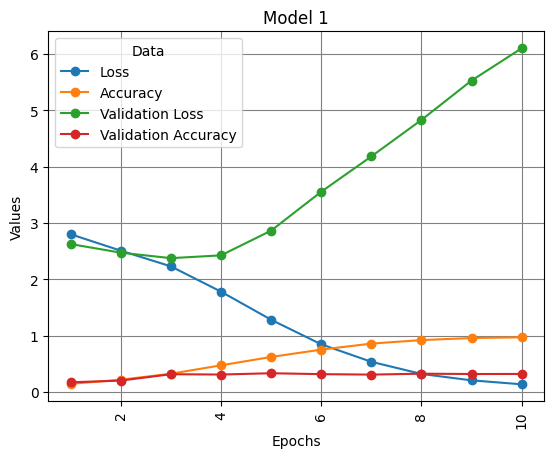

In [40]:
plt.plot(epochs_1, loss_1, label =  "Loss", marker = "o")
plt.plot(epochs_1, acc_1, label =  "Accuracy", marker = "o")
plt.plot(epochs_1, val_loss_1, label =  "Validation Loss", marker = "o")
plt.plot(epochs_1, val_acc_1, label =  "Validation Accuracy", marker = "o")

plt.title("Model 1")
plt.xlabel("Epochs")
plt.ylabel("Values")

plt.xticks(rotation = 90, ha = "center")
plt.grid(True, which ="both", color= "gray")

plt.legend(title="Data", loc = "upper left")
plt.show()

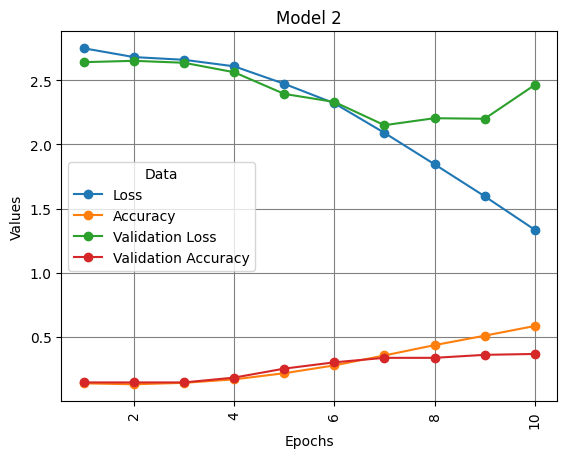

In [41]:
epochs_2 = [epoch for epoch in model_data_2['Epochs']]

loss_2 = [loss for loss in model_data_2['Loss']]
acc_2 = [loss for loss in model_data_2['Accuracy']]
val_loss_2 = [loss for loss in model_data_2['Validation Loss']]
val_acc_2 = [loss for loss in model_data_2['Validation Accuracy']]

plt.plot(epochs_2, loss_2, label =  "Loss", marker = "o")
plt.plot(epochs_2, acc_2, label =  "Accuracy", marker = "o")
plt.plot(epochs_2, val_loss_2, label =  "Validation Loss", marker = "o")
plt.plot(epochs_2, val_acc_2, label =  "Validation Accuracy", marker = "o")

plt.title("Model 2")
plt.xlabel("Epochs")
plt.ylabel("Values")

plt.xticks(rotation = 90, ha = "center")
plt.grid(True, which ="both", color= "gray")

plt.legend(title="Data", loc = "center left")
plt.show()

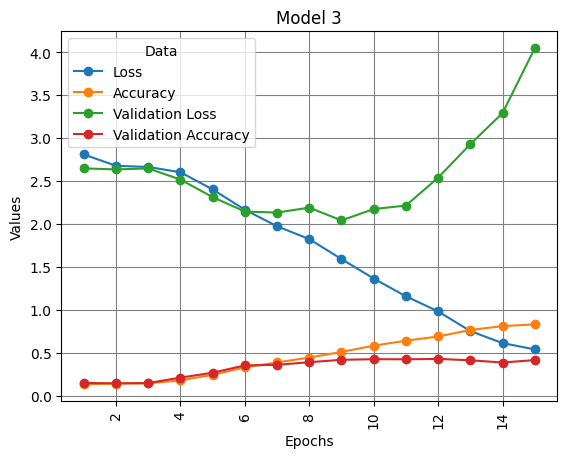

In [42]:
epochs_3 = [epoch for epoch in model_data_3['Epochs']]

loss_3 = [loss for loss in model_data_3['Loss']]
acc_3 = [loss for loss in model_data_3['Accuracy']]
val_loss_3 = [loss for loss in model_data_3['Validation Loss']]
val_acc_3 = [loss for loss in model_data_3['Validation Accuracy']]
3
plt.plot(epochs_3, loss_3, label =  "Loss", marker = "o")
plt.plot(epochs_3, acc_3, label =  "Accuracy", marker = "o")
plt.plot(epochs_3, val_loss_3, label =  "Validation Loss", marker = "o")
plt.plot(epochs_3, val_acc_3, label =  "Validation Accuracy", marker = "o")

plt.title("Model 3")
plt.xlabel("Epochs")
plt.ylabel("Values")

plt.xticks(rotation = 90, ha = "center")
plt.grid(True, which ="both", color= "gray")

plt.legend(title="Data", loc = "upper left")
plt.show()

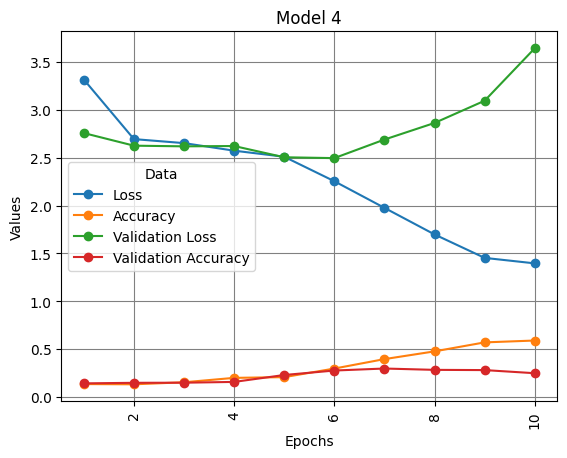

In [45]:
epochs_4 = [epoch for epoch in model_data_4['Epochs']]

loss_4 = [loss for loss in model_data_4['Loss']]
acc_4 = [loss for loss in model_data_4['Accuracy']]
val_loss_4 = [loss for loss in model_data_4['Validation Loss']]
val_acc_4 = [loss for loss in model_data_4['Validation Accuracy']]

plt.plot(epochs_4, loss_4, label =  "Loss", marker = "o")
plt.plot(epochs_4, acc_4, label =  "Accuracy", marker = "o")
plt.plot(epochs_4, val_loss_4, label =  "Validation Loss", marker = "o")
plt.plot(epochs_4, val_acc_4, label =  "Validation Accuracy", marker = "o")

plt.title("Model 4")
plt.xlabel("Epochs")
plt.ylabel("Values")

plt.xticks(rotation = 90, ha = "center")
plt.grid(True, which ="both", color= "gray")

plt.legend(title="Data", loc = "center left")
plt.show()